In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns

# Set other default styles
sns.set(style="white", color_codes=True, font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score,accuracy_score,f1_score, r2_score,mean_squared_error

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df_titanic=pd.read_csv("titanic.csv")

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.shape

(891, 12)

In [6]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [9]:
df_titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
df_titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [11]:
df_titanic['Age'].max(), df_titanic['Age'].min()

(80.0, 0.42)

In [12]:
def age_approx(row):
    Age = row['Age']
    Pclass = row['Pclass']
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
df_titanic.groupby('Pclass')[df_titanic.select_dtypes(include='number').columns].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
2,0.472826,2.0,29.877630,0.402174,0.380435,20.662183
3,0.242363,3.0,25.140620,0.615071,0.393075,13.675550


In [14]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df_titanic['Age'] = df_titanic.apply(age_approx, axis=1)

In [16]:
df_titanic['Age'].value_counts()

Age
24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [17]:
df_titanic.dropna(inplace=True)

In [18]:
df_ohe=pd.get_dummies(df_titanic,columns=['Sex','Embarked']).astype(int)

In [19]:
df_ohe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


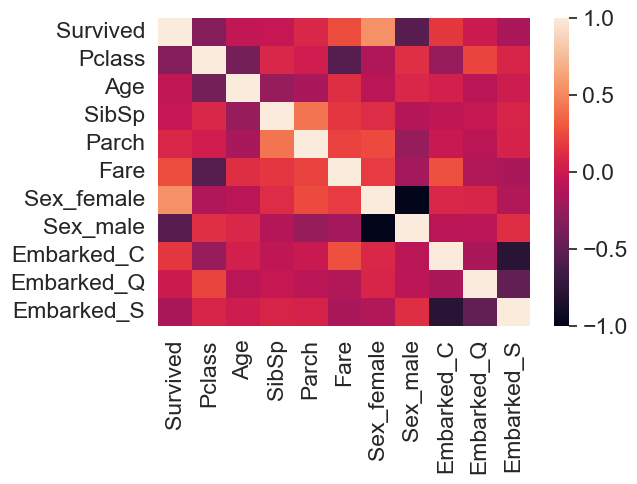

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df_ohe.corr())
plt.show()

In [42]:
df_ohe.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [44]:
X=df_ohe.drop('Survived',axis=1)
y=df_ohe['Survived']

In [46]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=45)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 10)
(267, 10)
(622,)
(267,)


In [52]:
logReg=LogisticRegression()

In [54]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred_survival=logReg.predict(x_test)

In [58]:
y_pred_survival

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [60]:
logReg.predict_proba(x_test)

array([[0.73093694, 0.26906306],
       [0.0415208 , 0.9584792 ],
       [0.7991127 , 0.2008873 ],
       [0.85644073, 0.14355927],
       [0.14698222, 0.85301778],
       [0.12664301, 0.87335699],
       [0.89176766, 0.10823234],
       [0.92592743, 0.07407257],
       [0.71421936, 0.28578064],
       [0.55823328, 0.44176672],
       [0.54009372, 0.45990628],
       [0.89895881, 0.10104119],
       [0.43463825, 0.56536175],
       [0.97627193, 0.02372807],
       [0.86473779, 0.13526221],
       [0.66152417, 0.33847583],
       [0.71421936, 0.28578064],
       [0.09669944, 0.90330056],
       [0.85113514, 0.14886486],
       [0.18742947, 0.81257053],
       [0.60834028, 0.39165972],
       [0.87069461, 0.12930539],
       [0.94636701, 0.05363299],
       [0.958038  , 0.041962  ],
       [0.36140981, 0.63859019],
       [0.24007728, 0.75992272],
       [0.09923249, 0.90076751],
       [0.81921503, 0.18078497],
       [0.08030428, 0.91969572],
       [0.96052307, 0.03947693],
       [0.

In [62]:
confusion_matrix(y_pred=y_pred_survival,y_true=y_test)

array([[152,  17],
       [ 38,  60]], dtype=int64)

In [64]:
accuracy_score(y_pred=y_pred_survival,y_true=y_test)

0.7940074906367042

In [72]:
print(classification_report(y_test,y_pred_survival))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       169
           1       0.78      0.61      0.69        98

    accuracy                           0.79       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267

